In [1]:
import os
import pandas as pd
import numpy as np
import micromag as mg
import matplotlib.pyplot as plt
import matplotlib.patches
import os

In [2]:
def angular_distance(vec_a, vec_b):
    # Produto escalar entre os vetores
    dot_product = np.dot(vec_a, vec_b)
    
    # Magnitudes dos vetores
    magnitude_a = np.linalg.norm(vec_a)
    magnitude_b = np.linalg.norm(vec_b)
    
    # Cálculo do cosseno do ângulo
    cos_theta = dot_product / (magnitude_a * magnitude_b)
    
    # Ângulo em radianos
    theta = np.rad2deg(np.arccos(cos_theta))
    # theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))# Clipping para evitar erros numéricos
    return theta

In [3]:
r2 =  0.9

In [4]:
import os
import pandas as pd
import numpy as np

# Pasta onde os arquivos CSV estão localizados
csv_folder = "csv_files_real_data"

# Dicionários para armazenar os momentos dipolares e os valores de R² por arquivo
data_standard = {}
data_iterative = {}

# Processar os arquivos da pasta
for file in os.listdir(csv_folder):
    if file.endswith("_standard.csv"):
        # Ler os arquivos padrão
        df_standard = pd.read_csv(os.path.join(csv_folder, file))
        name = file.replace("_standard.csv", "")  # Obter o nome base do arquivo
        data_standard[name] = {
            "mx_standard": df_standard['mx_standard'].values,
            "my_standard": df_standard['my_standard'].values,
            "mz_standard": df_standard['mz_standard'].values,
            "r2_standard": df_standard['r_2_standard'].values,
        }

    elif file.endswith("_iterative.csv"):
        # Ler os arquivos iterativos
        df_iterative = pd.read_csv(os.path.join(csv_folder, file))
        name = file.replace("_iterative.csv", "")  # Obter o nome base do arquivo
        data_iterative[name] = {
            "mx_iterative": df_iterative['mx_iterative'].values,
            "my_iterative": df_iterative['my_iterative'].values,
            "mz_iterative": df_iterative['mz_iterative'].values,
            "r2_iterative": df_iterative['r_2_iterative'].values,
        }


In [5]:
# Criar dicionários para armazenar os índices ordenados para cada arquivo
sorted_indices_standard = {}
sorted_indices_iterative = {}

# Calcular os índices ordenados para os arquivos do método standard
for name, data in data_standard.items():
    r2_standard = data["r2_standard"]  # Extrair os valores de R²
    sorted_indices_standard[name] = np.argsort(r2_standard)[::-1]

# Calcular os índices ordenados para os arquivos do método iterative
for name, data in data_iterative.items():
    r2_iterative = data["r2_iterative"]  # Extrair os valores de R²
    sorted_indices_iterative[name] = np.argsort(r2_iterative)[::-1]


In [6]:
# Reorganizar os dados com base nos índices ordenados
for name in data_standard:
    indices = sorted_indices_standard[name]
    data_standard[name]["mx_standard"] = data_standard[name]["mx_standard"][indices]
    data_standard[name]["my_standard"] = data_standard[name]["my_standard"][indices]
    data_standard[name]["mz_standard"] = data_standard[name]["mz_standard"][indices]
    data_standard[name]["r2_standard"] = data_standard[name]["r2_standard"][indices]

for name in data_iterative:
    indices = sorted_indices_iterative[name]
    data_iterative[name]["mx_iterative"] = data_iterative[name]["mx_iterative"][indices]
    data_iterative[name]["my_iterative"] = data_iterative[name]["my_iterative"][indices]
    data_iterative[name]["mz_iterative"] = data_iterative[name]["mz_iterative"][indices]
    data_iterative[name]["r2_iterative"] = data_iterative[name]["r2_iterative"][indices]


In [7]:
# Dicionários para armazenar inclinação e declinação
inc_standard, dec_standard = {}, {}
inc_iterative, dec_iterative = {}, {}

# Calcular inclinação e declinação para os dados padrão
for name, data in data_standard.items():
    moments = np.column_stack((
        data["mx_standard"], 
        data["my_standard"], 
        data["mz_standard"]
    ))
    inc_list, dec_list = [], []
    for n in range(2, len(moments)):
        vector_sum = np.sum(moments[:n, :], axis=0)
        inc, dec, _ = mg.vector_to_angles(vector_sum)
        inc_list.append(inc)
        dec_list.append(dec)
    inc_standard[name] = np.array(inc_list)
    dec_standard[name] = np.array(dec_list)

# Calcular inclinação e declinação para os dados iterativos
for name, data in data_iterative.items():
    moments = np.column_stack((
        data["mx_iterative"], 
        data["my_iterative"], 
        data["mz_iterative"]
    ))
    inc_list, dec_list = [], []
    for n in range(2, len(moments)):
        vector_sum = np.sum(moments[:n, :], axis=0)
        inc, dec, _ = mg.vector_to_angles(vector_sum)
        inc_list.append(inc)
        dec_list.append(dec)
    inc_iterative[name] = np.array(inc_list)
    dec_iterative[name] = np.array(dec_list)



In [8]:
# # Threshold de R²
# r2_threshold = r2

# # Função para calcular os valores filtrados e acumulados
# def process_dipole_moments(data_dict, r2_key, moment_keys):
#     results = {}
#     for name, data in data_dict.items():
#         r2_values = data[r2_key]
#         moments = np.column_stack([data[key] for key in moment_keys])

#         # Filtrar os momentos com base no R²
#         filtered_moments = moments[r2_values >= r2_threshold]

#         # Inicializar listas para armazenar os resultados
#         inc, dec, vector_sum = [], [], []
#         inc_filtered, dec_filtered, vector_sum_filtered = [], [], []

#         # Calcular para todos os momentos
#         for n in range(2, len(moments)):
#             vector_sum = np.sum(moments[:n, :], axis=0)


#         # Calcular para os momentos filtrados
#         for n in range(2, len(filtered_moments)):
#             vector_sum_filtered = np.sum(filtered_moments[:n, :], axis=0)


#         # Armazenar os resultados
#         results[name] = {
#             "vector_sum": np.array(vector_sum),
#             "vector_sum_filtered": np.array(vector_sum_filtered)
#         }
#     return results

# # Processar os dados padrão e iterativos
# results_standard = process_dipole_moments(
#     data_standard, 
#     "r2_standard", 
#     ["mx_standard", "my_standard", "mz_standard"]
# )

# results_iterative = process_dipole_moments(
#     data_iterative, 
#     "r2_iterative", 
#     ["mx_iterative", "my_iterative", "mz_iterative"]
# )

In [9]:
import numpy as np

# Função para calcular os valores filtrados e acumulados
def process_dipole_moments(data_dict, r2_key, moment_keys, r2_threshold=0.85):
    results = {}
    for name, data in data_dict.items():
        r2_values = data[r2_key]
        moments = np.column_stack([data[key] for key in moment_keys])

        # Filtrar os momentos com base no R²
        filtered_moments = moments[r2_values >= r2_threshold]

        # Calcular a norma de cada vetor de dipolo
        norm_values = np.linalg.norm(filtered_moments, axis=1)

        # Aplicar log10 nos valores das normas para ajustar para ordens de grandeza
        log_norm_values = np.log10(norm_values)

        # Calcular Q1 (primeiro quartil) e Q3 (terceiro quartil) na escala logarítmica
        Q1 = np.percentile(log_norm_values, 25)
        Q3 = np.percentile(log_norm_values, 75)

        # Calcular o IQR (Interquartile Range) na escala logarítmica
        IQR = Q3 - Q1

        # Determinar os limites superior e inferior para outliers na escala logarítmica
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar os outliers
        filtered_moments_no_outliers = filtered_moments[(log_norm_values >= lower_bound) & (log_norm_values <= upper_bound)]

        # Inicializar listas para armazenar os resultados
        inc_filtered, dec_filtered, vector_sum_filtered = [], [], []

        # Calcular para os momentos filtrados sem outliers
        for n in range(2, len(filtered_moments_no_outliers)):
            vector_sum_filtered = np.sum(filtered_moments_no_outliers[:n, :], axis=0)
            i_filtered, d_filtered, _ = mg.vector_to_angles(vector_sum_filtered)
            inc_filtered.append(i_filtered)
            dec_filtered.append(d_filtered)

        # Armazenar os resultados
        results[name] = {
            "vector_sum": np.array(vector_sum_filtered),
            "inc_filtered": np.array(inc_filtered),
            "dec_filtered": np.array(dec_filtered)
        }
    return results


# Processar os dados padrão e iterativos
results_standard = process_dipole_moments(
    data_standard, 
    "r2_standard", 
    ["mx_standard", "my_standard", "mz_standard"], r2
)

results_iterative = process_dipole_moments(
    data_iterative, 
    "r2_iterative", 
    ["mx_iterative", "my_iterative", "mz_iterative"], r2
)

In [10]:
# Inicializar arrays vazios para armazenar os vetores de soma
all_vectors_standard = []
all_vectors_iterative = []
all_vectors_standard_filtered = []
all_vectors_iterative_filtered = []

# Adicionar os vetores de soma de cada caso nos arrays correspondentes
for name in results_standard.keys():
    all_vectors_standard.append(results_standard[name]["vector_sum"])
    all_vectors_standard_filtered.append(results_standard[name]["vector_sum"])

for name in results_iterative.keys():
    all_vectors_iterative.append(results_iterative[name]["vector_sum"])
    all_vectors_iterative_filtered.append(results_iterative[name]["vector_sum"])

# Converter as listas para arrays numpy para facilitar manipulação posterior
all_vectors_standard = np.array(all_vectors_standard)
all_vectors_iterative = np.array(all_vectors_iterative)
all_vectors_standard_filtered = np.array(all_vectors_standard_filtered)
all_vectors_iterative_filtered = np.array(all_vectors_iterative_filtered)

# Exibir as formas dos arrays para verificar
print(f"all_vectors_standard shape: {all_vectors_standard.shape}")
print(f"all_vectors_iterative shape: {all_vectors_iterative.shape}")
print(f"all_vectors_standard_filtered shape: {all_vectors_standard_filtered.shape}")
print(f"all_vectors_iterative_filtered shape: {all_vectors_iterative_filtered.shape}")


all_vectors_standard shape: (20, 3)
all_vectors_iterative shape: (20, 3)
all_vectors_standard_filtered shape: (20, 3)
all_vectors_iterative_filtered shape: (20, 3)


In [11]:
all_vectors_standard.shape

(20, 3)

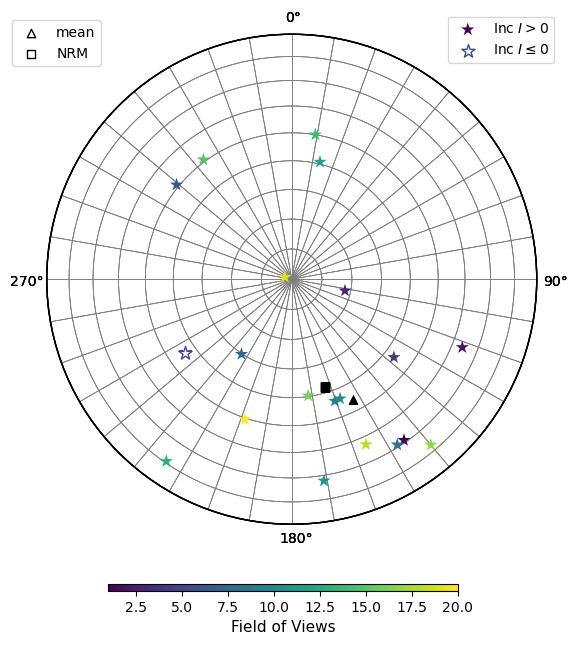

In [12]:
vectors_dataset = all_vectors_iterative_filtered
mean_direction = np.sum(vectors_dataset, axis=0)

inc_ref, dec_ref = 52, 163
reference_vector = mg.angles_to_vector(inc_ref, dec_ref, 1)

inc, dec, _, = mg.vector_to_angles(vectors_dataset)
num_sources = len(vectors_dataset)
new_amp = range(1,num_sources+1)
new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)



projection = mg.StereographicProjection(new_vector_sum)
projection_mean = mg.StereographicProjection(np.reshape(mean_direction, (1,3)))
projection_NRM = mg.StereographicProjection(np.reshape(reference_vector, (1,3)))

cmap = "viridis"  # Escolha um colormap
kwargs = dict(s=100, cmap=cmap, vmin=1, vmax=num_sources, marker='*')
kwargs_mean = dict(s=50, marker='^')
kwargs_NRM = dict(s=50, marker='s')

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

tmp = projection.plot(ax=ax, draw_cross=False, add_radial_grid=True, label="Inc", add_legend=True, **kwargs)
projection_mean.plot(ax=ax, label="mean",
                     draw_cross=False, add_radial_grid=True, **kwargs_mean)
projection_NRM.plot(ax=ax, label="NRM", 
                    draw_cross=False, add_radial_grid=True, **kwargs_NRM)

clb = fig.colorbar(
    tmp,
    ax=ax,
    cax=fig.add_axes([0.25, 0.05, 0.5, 0.01]),
    # format="%.0g",
    orientation="horizontal",
)
clb.set_label(label="Field of Views", fontsize=11)
clb.ax.tick_params(labelsize=10)
plt.scatter([],[], marker='^', label="mean", color="#ffffff00", edgecolors='k')
plt.scatter([],[], marker='s', label="NRM",  color="#ffffff00", edgecolors='k')
plt.legend(bbox_to_anchor=(-0.5, 82, 0.5, 0.5))

# Ajustar espaçamento e exibir o gráfico
# plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

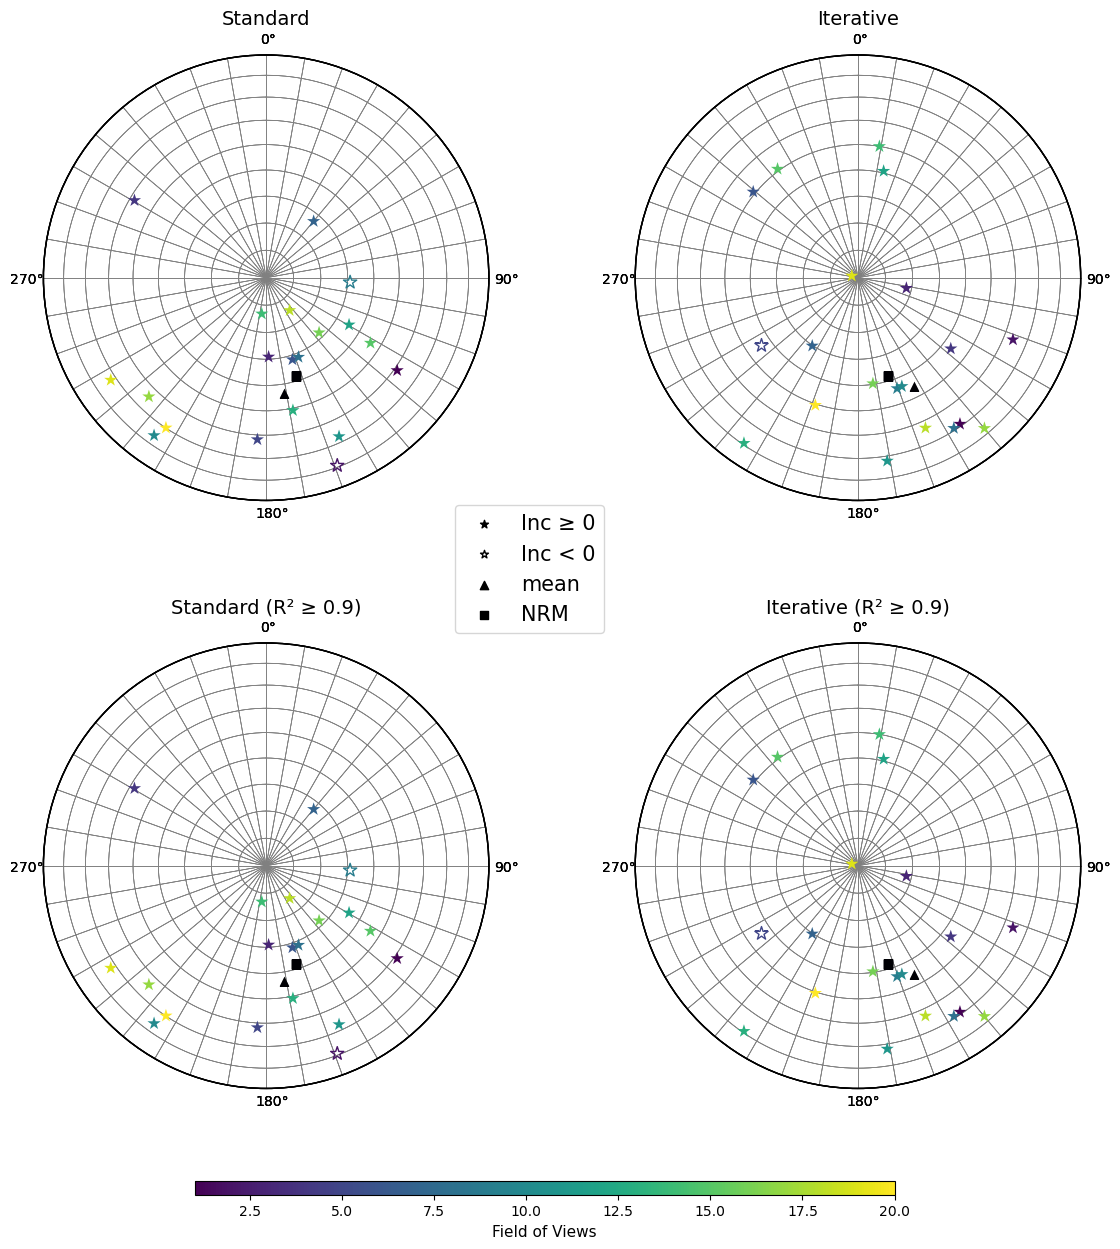

In [13]:
# Criar uma lista com todos os vetores para os quatro casos
vectors_cases = [
    all_vectors_standard, 
    all_vectors_iterative, 
    all_vectors_standard_filtered, 
    all_vectors_iterative_filtered
]

# Títulos para cada caso
titles = [
    "Standard", 
    "Iterative", 
    f"Standard (R² ≥ {r2})", 
    f"Iterative (R² ≥ {r2})"
]

# Configurações para o plot
cmap = "viridis"  # Colormap
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

# Loop sobre os 4 casos
for i, vectors_dataset in enumerate(vectors_cases):
    # Calcular a direção média
    mean_direction = np.sum(vectors_dataset, axis=0)

    # Definir o vetor de referência (NRM)
    inc_ref, dec_ref = 52, 163
    reference_vector = mg.angles_to_vector(inc_ref, dec_ref, 1)

    # Converter os vetores para ângulos
    inc, dec, _ = mg.vector_to_angles(vectors_dataset)
    num_sources = len(vectors_dataset)
    new_amp = range(1, num_sources + 1)
    new_vector_sum = mg.angles_to_vector(inc, dec, new_amp)

    # Projeções
    projection = mg.StereographicProjection(new_vector_sum)
    projection_mean = mg.StereographicProjection(np.reshape(mean_direction, (1, 3)))
    projection_NRM = mg.StereographicProjection(np.reshape(reference_vector, (1, 3)))

    # Configurações para os plots
    kwargs = dict(s=100, cmap=cmap, vmin=1, vmax=num_sources, marker='*')
    kwargs_mean = dict(s=50, marker='^')
    kwargs_NRM = dict(s=50, marker='s')

    # Plotar
    ax = axes[i]
    tmp = projection.plot(ax=ax, draw_cross=False, add_radial_grid=True, label="Inc", add_legend=False, **kwargs)
    projection_mean.plot(ax=ax, add_legend=False, **kwargs_mean)
    projection_NRM.plot(ax=ax, add_legend=False, draw_cross=False, add_radial_grid=True, **kwargs_NRM)

    # Ajustar título
    ax.set_title(titles[i], fontsize=14)
    # Barra de cores
    if i == 0:  # A barra de cores será exibida apenas no primeiro gráfico
        clb = fig.colorbar(
            tmp,
            ax=ax,
            cax=fig.add_axes([0.25, 0.05, 0.5, 0.01]),
            orientation="horizontal",
        )
        clb.set_label(label="Field of Views", fontsize=11)
        clb.ax.tick_params(labelsize=10)

plt.scatter([], [], marker='*', label="Inc ≥ 0", color="k", edgecolors='k')
plt.scatter([], [], marker='*', label="Inc < 0", color="#ffffff00", edgecolors='k')
plt.scatter([], [], marker='^', label="mean", color="k", edgecolors='k')
plt.scatter([], [], marker='s', label="NRM", color="k", edgecolors='k')
plt.legend(bbox_to_anchor=(0.6, 50.0), fontsize=15)
# Ajustar espaçamento e exibir o gráfico
# plt.tight_layout(rect=[0.5, 0.1, 1, 1])
plt.show()
